# EE511 Hw2
### Name: Royston Marian Mascarenhas


# [Double Rejection]

In [57]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import networkx as nx
import scipy.stats as st

In [3]:
def gam(num):
    return(np.math.factorial(num-1))

In [135]:
alpha = 8
beta = 5
x_list = []
fx_list = []
beta_list = []
tr_list = []
g_array = np.zeros((6000,2))
i = 0
j = 0
uniform_list = np.random.uniform(0,6,6000)
for x in uniform_list:
    if(x>0 and x<=1):
        sample = 0.5*(((gam(alpha +beta))/(gam(alpha)*gam(beta)))*(x**(alpha-1))*((1-x)**(beta-1)))
        beta_list.append(sample)
    elif(x>4 and x<=5):
        sample = 0.5*(x-4)
        tr_list.append(sample)
    elif(x>5 and x<=6):
        sample = -0.5*(x-6)
        tr_list.append(sample)
    else:
        sample = 0
    g_array[i,0] = sample
    g_array[i,1] = x
    i = i +1

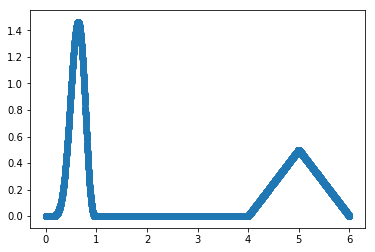

In [179]:
plt.scatter(g_array[:,1],g_array[:,0])

## Rejection sampling using single uniform distribution envelope from 0 to 6

In [160]:
c1 = np.max(g_array[:,0])
v = np.random.uniform(0,1,6000)
u = np.random.uniform(0,c1,6000)
lst_c1 = []
rej = 0
for i in range(0,6000):
    if(u[i]<=g_array[i,0]):
        lst.append(u[i])
    else:
        rej = rej + 1
print("Rejection rate for uniform from 0 to c: "+str(c1)+" is "+str(rej/6000*100))

Rejection rate for uniform from 0 to c: 1.4630925416519944 is 88.2


In [161]:
c1 = np.max(g_array[:,0])
v = np.random.uniform(0,1,6000)
u = np.random.uniform(0,c1+1,6000)
lst_c2 = []
rej = 0
for i in range(0,6000):
    if(u[i]<=g_array[i,0]):
        lst_c2.append(u[i])
    else:
        rej = rej + 1
print("Rejection rate for uniform from 0 to c + 1: "+str(c1+1)+" is "+str(rej/6000*100))

Rejection rate for uniform from 0 to c + 1: 2.4630925416519944 is 93.01666666666667


In [162]:
c1 = np.max(g_array[:,0])
v = np.random.uniform(0,1,6000)
u = np.random.uniform(0,c1+2,6000)
lst_c3 = []
rej = 0
for i in range(0,6000):
    if(u[i]<=g_array[i,0]):
        lst_c3.append(u[i])
    else:
        rej = rej + 1
print("Rejection rate for uniform from 0 to c + 2: "+str(c1+2)+" is "+str(rej/6000*100))

Rejection rate for uniform from 0 to c + 2: 3.4630925416519944 is 94.51666666666667


## Rejection sampling using two uniform distribution envelope 
### First from 0 to 1 scaled to maximum of beta distribution
### Second from 4 to 6 scaled to maximum of triangular distribution

In [164]:
def getfx1(x):
    alpha = 8
    beta = 5
    sample = 0.5*(((gam(alpha +beta))/(gam(alpha)+gam(beta)))*(x**(alpha-1))*((1-x)**(beta-1)))
    return sample

def getfx2(x):
    sample = 0
    if(x>4 and x<=5):
        sample = 0.5*(x-4)
    elif(x>5 and x<=6):
        sample = -0.5*(x-6)
    return sample

In [188]:
#step1 : uniform from a to b 
v = np.random.uniform(0,1,1000)
u = np.random.uniform(0,c1,1000)
lst1 = []
rej1 = 0
for i in range(0,1000):
    fx = getfx1(v[i])
    if(u[i]<=fx):
        lst1.append(u[i])
    else:
        rej1 = rej1 + 1

        
u = np.random.uniform(0,0.5,2000) #since 0.5 is the maximum value of the distribution 
v = np.random.uniform(4,6,2000)
lst2 = []
l = []
rej2 = 0
for i in range(0,2000):
    fx = getfx2(v[i])
    l.append(fx)
    if(u[i]<=fx):
        lst2.append(u[i])
    else:
        rej2 = rej2 + 1
        
    

In [189]:
uniform_list = np.random.uniform(0,1,1000)
lsty = []
for i in range(0,1000):
    x = uniform_list[i]
    sample = 0.5*(((gam(alpha +beta))/(gam(alpha)*gam(beta)))*(x**(alpha-1))*((1-x)**(beta-1)))
    lsty.append(sample)
beta_max = np.max(lsty)
print(beta_max)

1.4630818612730276


In [191]:
#Rejection rate using two envelopes:
rej_f = (rej1 + rej2)/3000 * 100
print("Rejection rate with two envelopes scaled to sizes of respective maxima: "+str(rej_f))

Rejection rate with two envelopes scaled to sizes of respective maxima: 44.03333333333334


### Observations [Relevant Statistics and Discussion of Result]:

- We can observe the following rejection rates :

Rejection rates using one envelope:

Rejection rate for uniform from 0 to c: 1.4630925416519944 is 88.2 <br>
Rejection rate for uniform from 0 to c + 1: 2.4630925416519944 is 93.01666666666667 <br>
Rejection rate for uniform from 0 to c + 2: 3.4630925416519944 is 94.51666666666667 <br>

Improvement: Rejection rates using two envelopes: <br>
Rejection rate with two envelopes scaled to sizes of respective maxima: 44.03333333333334

- The following observations can be made:

Using one envelope: (see end of project for figure)
- High rejection rate is observed as a large portion of the uniform distribution (proposal samples) belong to an area of the original distribution where there are no magnitude values
- There is more rejection in the area of triangular distribution as the scaled up uniform distribution has a lot of redundant region between magnitudes 1.4 (max of beta) and 0.5 (max of triangular)
- The rejection rate increases with increase in proposal uniform distribution magnitude ie. as can be observed c+1 and c+2 above

Using two envelopes:

- We can reduce the rejection rate by a good amount by taking two envelopes, one on the beta distribution scaled to the max of beta and one on the triangular scaled up to the max of the triangular
- There is a reduction of 44% in the rejection rate


# [Independence: Internal]

In [229]:
alpha = 8
beta = 5
x_list = []
fx_list = []
g_array = np.zeros((1000,2))
i = 0
j = 0
uniform_list = np.random.uniform(0,6,1000)
for x in uniform_list:
    if(x>0 and x<=1):
        sample = 0.5*(((gam(alpha +beta))/(gam(alpha)+gam(beta)))*(x**(alpha-1))*((1-x)**(beta-1)))
    elif(x>4 and x<=5):
        sample = 0.5*(x-4)
    elif(x>5 and x<=6):
        sample = -0.5*(x-6)
    else:
        sample = 0
    g_array[i,0] = sample
    g_array[i,1] = x
    i = i +1

gk = g_array[:,0]
#gkp5 = np.pad(g_array[5:999,0],5,'constant')
gkp5 = g_array[5:1000,0]
pad = np.zeros(5)
gkp5=np.concatenate((gkp5,pad))

#### Results and Plots:

In [230]:
np.cov(gk,gkp5) #using the in built function

array([[41.02468262,  0.09176956],
       [ 0.09176956, 40.56144668]])

In [231]:
mean_gk = np.mean(gk) #using the formula
mean_gkp5 = np.mean(gkp5)
cov = 0
for i in range(0,1000):
    cov = cov + ((gk[i]-mean_gk) * (gkp5[i]-mean_gkp5))
cov = cov / 1000
cov

0.09167779215771753

(array([ 31., 109., 175., 224., 189., 149.,  85.,  23.,  13.,   2.]),
 array([0.03886556, 0.12020289, 0.20154021, 0.28287753, 0.36421486,
        0.44555218, 0.5268895 , 0.60822683, 0.68956415, 0.77090147,
        0.8522388 ]),
 <a list of 10 Patch objects>)

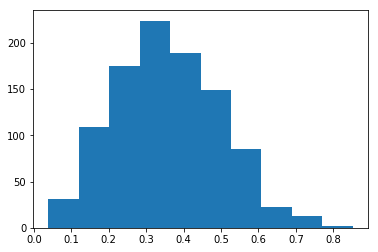

In [232]:
g=np.random.beta(4,7,1000)
plt.hist(g)

#### Algorithm:

1. Take the bimiodal distribution obtained in question 1 but only 1000 samples
2. Obtain a time lagged version by a factor of 5 units 
3. Calculate the covariance

#### Discussion: 
1. We can see that the covariance is very small and almost approaching 0
2. Therefore, we can assume and conclude that the two distributions are independent
3. However, independence can be concluded if the covariance is 0. However, the reverse assumption is not conclusive

# [Independence: External]

In [200]:
import numpy as np
alpha = 8
beta = 5
g_array1 = np.zeros((1000,2))
i = 0
j = 0
uniform_list = np.random.uniform(0,1,999)
for x in uniform_list:
    sample = (((gam(alpha +beta))/(gam(alpha)+gam(beta)))*(x**(alpha-1))*((1-x)**(beta-1)))
    g_array1[i,0] = sample
    g_array1[i,1] = x
    i = i +1
    

In [201]:
g_array2 = np.zeros((1000,2))
i = 0
j = 0
alpha = 4
beta = 7
for x in uniform_list:
    sample = (((gam(alpha +beta))/(gam(alpha)+gam(beta)))*(x**(alpha-1))*((1-x)**(beta-1)))
    g_array2[i,0] = sample
    g_array2[i,1] = x
    i = i +1
    

In [202]:
g_array3 = np.column_stack((g_array1[:,0],g_array2[:,0]))

In [203]:
import pandas as pd
df = pd.DataFrame(g_array3)
df.columns=['g1','g2']

### Results and Plots:

In [204]:
cr = pd.crosstab(df.iloc[:,0],df.iloc[:,1],margins=True, margins_name="Total")
cr

g2,0.0,8.755959570262267e-21,1.249317874006374e-13,1.441721415166605e-13,5.026714143152623e-11,7.725257456258672e-11,9.0783814051132e-11,1.1178918808785538e-10,1.4187373284760645e-10,3.3216864629500053e-10,...,16.24382966260322,16.245719709588364,16.246755267624685,16.246881428026075,16.248466061705685,16.250477163092004,16.25175009933799,16.251808042207617,16.252297737386556,Total
g1,,,,,,,,,,,,,,,,,,,,,
0.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1.07006029932323e-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5.146588130723905e-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3.1612518081234004e-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3.4418355984532307e-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6.276930119898938e-14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9.072109299834718e-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1.3737985363429359e-11,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1.2443600987885843e-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [205]:
import scipy.stats
scipy.stats.chi2_contingency(cr)

(999000.0000000003,
 0.760176731459796,
 1000000,
 array([[1.e-03, 1.e-03, 1.e-03, ..., 1.e-03, 1.e-03, 1.e+00],
        [1.e-03, 1.e-03, 1.e-03, ..., 1.e-03, 1.e-03, 1.e+00],
        [1.e-03, 1.e-03, 1.e-03, ..., 1.e-03, 1.e-03, 1.e+00],
        ...,
        [1.e-03, 1.e-03, 1.e-03, ..., 1.e-03, 1.e-03, 1.e+00],
        [1.e-03, 1.e-03, 1.e-03, ..., 1.e-03, 1.e-03, 1.e+00],
        [1.e+00, 1.e+00, 1.e+00, ..., 1.e+00, 1.e+00, 1.e+03]]))

(array([ 37.,  97., 152., 197., 175., 141.,  99.,  64.,  29.,   9.]),
 array([0.07080214, 0.13988795, 0.20897375, 0.27805956, 0.34714537,
        0.41623117, 0.48531698, 0.55440278, 0.62348859, 0.6925744 ,
        0.7616602 ]),
 <a list of 10 Patch objects>)

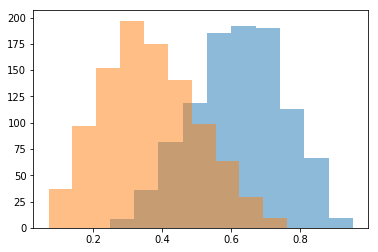

In [208]:
plt.figure(1)
ga = np.random.beta(8,5,1000)
gb = np.random.beta(4,7,1000)
#plt.hist(g_array1[:,0],alpha=0.5, label='B(8,5)')
#plt.hist(g_array2[:,0],alpha=0.5, label='B(4,7)')
plt.hist(ga,alpha=0.5, label='B(8,5)')
plt.hist(gb,alpha=0.5, label='B(4,7)')

In [209]:
g_array3 = np.column_stack((ga,gb))
import pandas as pd
df = pd.DataFrame(g_array3)
df.columns=['g1','g2']
cr = pd.crosstab(df.iloc[:,0],df.iloc[:,1],margins=True, margins_name="Total")
cr
import scipy.stats
scipy.stats.chi2_contingency(cr)

(999000.0000000003,
 0.760176731459796,
 1000000,
 array([[1.e-03, 1.e-03, 1.e-03, ..., 1.e-03, 1.e-03, 1.e+00],
        [1.e-03, 1.e-03, 1.e-03, ..., 1.e-03, 1.e-03, 1.e+00],
        [1.e-03, 1.e-03, 1.e-03, ..., 1.e-03, 1.e-03, 1.e+00],
        ...,
        [1.e-03, 1.e-03, 1.e-03, ..., 1.e-03, 1.e-03, 1.e+00],
        [1.e-03, 1.e-03, 1.e-03, ..., 1.e-03, 1.e-03, 1.e+00],
        [1.e+00, 1.e+00, 1.e+00, ..., 1.e+00, 1.e+00, 1.e+03]]))

#### Algorithm:
1. Take 1000 samples of each beta distribution
2. Plot them in a contingency table to get a 1000 x 1000 table
3. Reduce the table to a 3 x 3 table
4. Calculate chi square of the 1000 x 1000 table and the 3 x 3 table

#### Discussion: 

1. Here we can see that the contingency table contains a lot of entries with zeros in them
2. Therefore, the chi square value is tending towards infinity
3. As the size of the table is condensed to a 3 x 3 table, the chi square values reduces
4. Eventually chi square values converges to a value from 2 to 3
5. Therefore, we can say that the two distributions are not wholly independent but more independent than dependent

# [Network Fit]

#### Algorithm:

- Generate adjacency matrix for given probability
- Convert the matrix to a graph 
- Count the degrees for each node
- Check convergence with given distributions

In [23]:
def DrawNetGraph(N,p,ret_flag):  
    #N = 
    mat = np.zeros((N,N))
    #p = 0.03
    for i in range(0,N):
        for j in range(0,N):
            mat[i,j] = np.random.uniform(0,1)
            if(mat[i,j]<p):
                mat[i,j] = 1
            else:
                mat[i,j] = 0
            if i==j:
                mat[i,j] = 0
    b=nx.from_numpy_matrix(mat)
    nx.draw(b)
    if(ret_flag==1):
        return mat
    else:
        return 0

In [24]:
def degree_count(mat,N):
    degree_arr = np.zeros((N,1))
    for i in range(0,N):
        degree_arr[i]=np.sum(mat[i,:])
    return degree_arr

## Results for part 1:

## p = 0.03

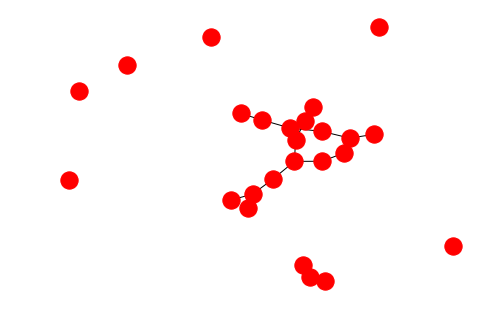

In [199]:
m=DrawNetGraph(25,0.03,1)

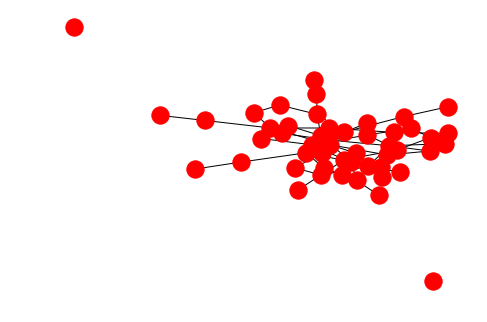

In [39]:
m=DrawNetGraph(50,0.03,1)

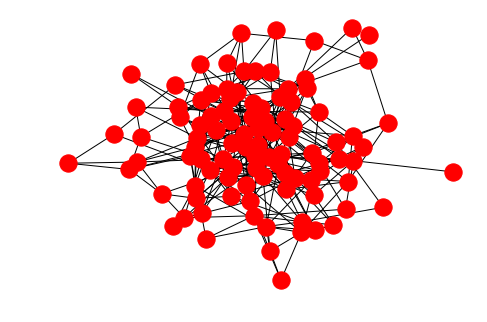

In [27]:
m=DrawNetGraph(100,0.03,1)

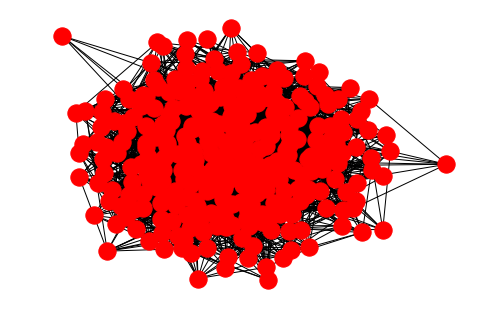

In [29]:
m=DrawNetGraph(300,0.03,1)

## p = 0.12

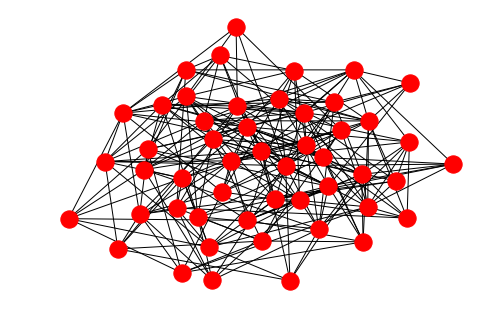

In [40]:
m=DrawNetGraph(50,0.12,1)

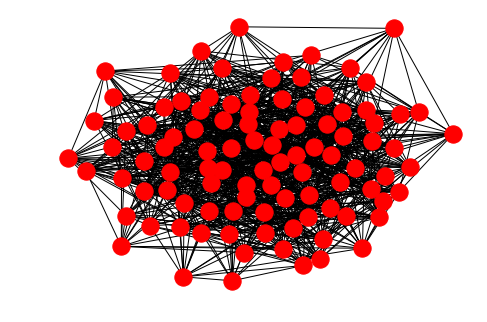

In [41]:
m=DrawNetGraph(100,0.12,1)

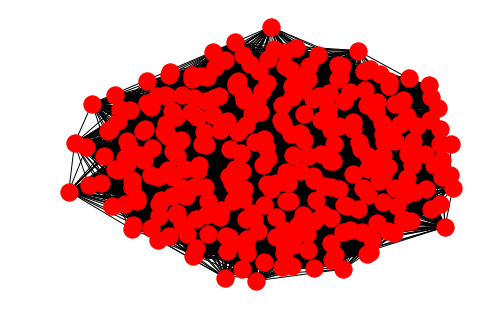

In [42]:
m=DrawNetGraph(300,0.12,1)

### Discussion:

We can see from the graphs that
1. With increasing n, the number of nodes increases 
2. With increasing n, the chances that two people could get connected also increases
3. In the first four graphs, since p is 0.03, there are not many visible connections in the graph (the chance of 2 people in the network to be connected is lesser than 3%)
4. In the next three graphs, since p is 0.12, more number of connections are observed between two people in the network (preliminary visual inspection) This is because the chance of two people in the network to be connected is less than 12% which is not saying much but it is a better bet than 3%.


## Results for part 2:

### n = 100, p = 0.06

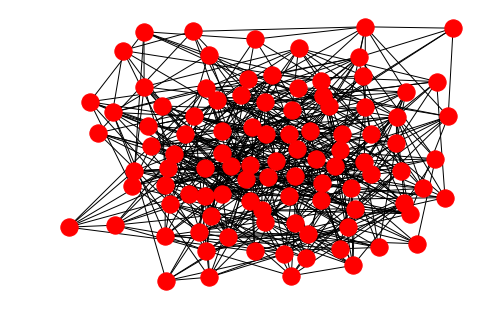

In [48]:
m=DrawNetGraph(100,0.06,1)
arr1 = degree_count(m,100)

In [49]:
np.transpose(arr1) #degree of all nodes from 1 - 100

array([[ 7.,  8.,  8.,  6.,  7.,  6.,  6.,  7.,  6., 10.,  3.,  6.,  8.,
         3.,  7.,  7.,  3.,  3.,  2.,  5.,  7.,  6.,  6.,  2.,  3.,  6.,
         8.,  9.,  3.,  7.,  8.,  6.,  4.,  3.,  4.,  5.,  5.,  4.,  5.,
         5.,  5.,  9.,  6.,  7., 11.,  8.,  8.,  4.,  4.,  5.,  8.,  3.,
         7.,  7.,  5.,  2.,  7.,  6.,  1.,  5.,  7., 10.,  8.,  6.,  6.,
        10.,  9.,  8.,  6.,  4.,  7.,  7.,  3., 10.,  6.,  5.,  8.,  6.,
         3.,  3.,  3.,  8.,  7.,  7.,  2.,  6.,  5.,  7.,  4.,  4.,  9.,
         3.,  2.,  9.,  2.,  6.,  3.,  5.,  9.,  5.]])

## Plot containing histogram of degrees of nodes:

(array([ 0.,  1.,  6., 14.,  8., 13., 18., 17., 12.,  6.,  5.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <a list of 11 Patch objects>)

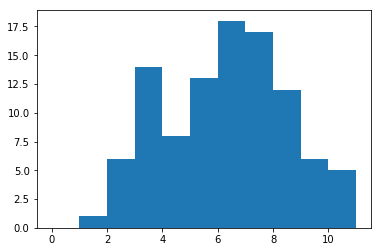

In [50]:
from matplotlib import pyplot as plt
bi = len(np.unique(arr1))
plt.hist(arr1,bins = bi,range=(0,np.max(arr1)))

In [54]:
poisson_prop=np.random.poisson(6,100)
binomial_prop = np.random.binomial(100,0.06,100)
sample = np.random.uniform(0,1)

In [81]:
def chisquare(obs,exp):
    cs = 0
    for i in range(0,len(obs)):
        if(exp[i]!=0):
            cs = cs + (((obs[i]-exp[i])**2)/exp[i])
    return cs
    

#### Chi Square goodness of fit tests

In [82]:
chi_fit = chisquare(arr1,poisson_prop)
chi_fit

array([224.03326118])

In [83]:
chi_fit = chisquare(arr1,binomial_prop)
chi_fit

array([232.82824675])

#### Goodness of fit tests: histograms of proposals (histogram of degrees of node is given above):

(array([ 4.,  6., 20., 36., 13.,  7., 12.,  1.,  0.,  1.]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ]),
 <a list of 10 Patch objects>)

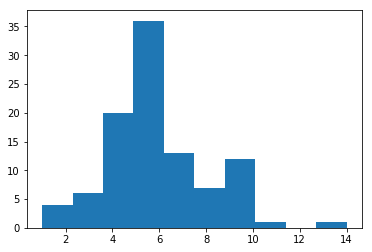

In [196]:
plt.hist(poisson_prop)

(array([ 3.,  4.,  6., 13., 13., 39.,  6.,  7.,  4.,  5.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

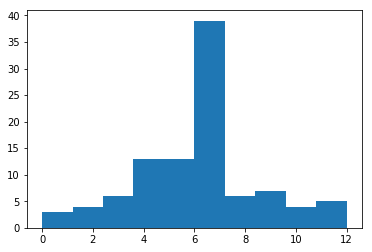

In [193]:
plt.hist(binomial_prop)

(array([ 1.,  6., 14.,  8., 13., 18., 17., 12.,  6.,  5.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <a list of 10 Patch objects>)

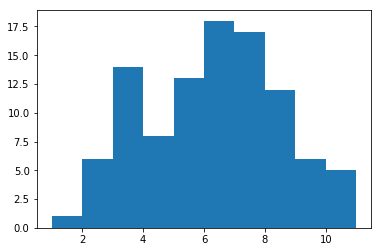

In [195]:
plt.hist(arr1)

## Additional Discussion:

- We can see that the histogram of degrees of node as well as the proposal histograms are centered at 6. Therefore, we can hawkeye that they are similar
- But are they good fits for the histograms? From the chi-square tests we can observe that the histogram for degrees of node is approximately the same for the binomial and the poisson
- We can therefore conclude that the goodness of fit for either distributions is not a tight fit but a good fit nonetheless
- But as the degrees of the nodes increase, the histogram for the degrees of the node converges towards the binomial and the poisson mentioned above